In [321]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sbs
import scipy as sp
from scipy import stats
import statistics as st  
import datetime 
from datetime import datetime      
from datetime import timedelta
#date_parser=lambda x:datetime.strptime(x,'%y/%m/%d')

## Import CPD Treatment Output

In [322]:
data1=pd.read_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/CPD Treatment Data/August/CPD Treatment_output_FINAL_OUTPUT_09_08_2024.csv')
data1

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\149189757.py:1: DtypeWarning: Columns (14,23,24,26,27,29,30,31,33,35,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/CPD Treatment Data/August/CPD Treatment_output_FINAL_OUTPUT_09_08_2024.csv')


,RKD.ID,Repeat.Instrument,Date_Of_Visit,Interval.from.diagnosis..months.,Immunosuppressive.status,Corticosteroids,Current.corticosteroid.dose,Corticosteroids.in.response.to.this.clinical.encounter.episode,Immunosuppressive.medication,Immunosuppressive.medication...other,...,CPD IV,CPD ISMed,Step1,Step2,Step3,Step4,Step5,Step6,CPD_on_off,Warnings
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,NaN,NaN,Off Treatment,NaN,NaN,NaN,Off Treatment,Treatment Status Unknown,Off Treatment,NaN
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,Cyclophosphamide,"Corticosteroids, Cyclophosphamide",NaN,NaN,On Treatment,NaN,NaN,On Treatment,On Treatment,NaN
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,Cyclophosphamide,"Corticosteroids, Cyclophosphamide",NaN,NaN,On Treatment,NaN,NaN,On Treatment,On Treatment,NaN
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,Cyclophosphamide,"Corticosteroids, Cyclophosphamide",NaN,On Treatment,On Treatment,On Treatment,On Treatment,On Treatment,On Treatment,NaN
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,Cyclophosphamide,"Corticosteroids, Cyclophosphamide",NaN,NaN,On Treatment,On Treatment,On Treatment,On Treatment,On Treatment,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10639,28621,Encounters,2024-07-19,0.0,Currently on immunosuppression,Yes,11 - 20 mg/day,Increased,No,NaN,...,NaN,Corticosteroids,NaN,On Treatment,NaN,On Treatment,Off Treatment,Treatment Status Unknown,On Treatment,"Source data error, IS status contradicting wit..."
10640,28622,Encounters,2024-07-30,0.0,Treatment Naive,Yes,NaN,Increased,Avacopan,NaN,...,NaN,Avacopan,Off Treatment,NaN,NaN,NaN,On Treatment,Treatment Status Unknown,Manual review,Treatment Naive contradicting with IS Med
10641,28623,Encounters,2024-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Treatment Status Unknown,Treatment Status Unknown,NaN
10642,28624,Encounters,2024-07-31,0.0,Treatment Naive,No,NaN,Increased,No,NaN,...,NaN,NaN,Off Treatment,NaN,NaN,NaN,Off Treatment,Treatment Status Unknown,Off Treatment,NaN


In [323]:


# Try reading the file with a different encoding
#file_path = 'C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/CPD Treatment Data/CPD Treatment_output_FINAL_OUTPUT_08_07_2024.csv'

#try:
    #data1 = pd.read_csv(file_path, encoding='utf-8')
#except UnicodeDecodeError:
    #data1 = pd.read_csv(file_path, encoding='ISO-8859-1')




In [324]:
data1['RKD.ID'].nunique()

1924

In [325]:
## Remove duplicates:
duplicateRows = data1[data1.duplicated(['RKD.ID','Date_Of_Visit'])]
duplicateRows

,RKD.ID,Repeat.Instrument,Date_Of_Visit,Interval.from.diagnosis..months.,Immunosuppressive.status,Corticosteroids,Current.corticosteroid.dose,Corticosteroids.in.response.to.this.clinical.encounter.episode,Immunosuppressive.medication,Immunosuppressive.medication...other,...,CPD IV,CPD ISMed,Step1,Step2,Step3,Step4,Step5,Step6,CPD_on_off,Warnings


In [326]:
#data1=pd.read_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/CPD Treatment Data/CPD Treatment_output_FINAL_OUTPUT_08_07_2024.csv')
#data1

In [327]:
data1['CPD_on_off'].value_counts(dropna=False)

CPD_on_off
On Treatment                6145
Off Treatment               2649
Treatment Status Unknown    1034
Manual review                614
Prednisolone<=10             202
Name: count, dtype: int64

## Import encounter dataset from pipeline

In [328]:
data2=pd.read_csv("C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/LSTM Data/August-2024/Redcap_CPDTreatment_data_merged_version0.0.3.110_Date2024-08-07 .csv")
data2

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1622696847.py:1: DtypeWarning: Columns (105,242,246,281,283,312,328) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv("C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/LSTM Data/August-2024/Redcap_CPDTreatment_data_merged_version0.0.3.110_Date2024-08-07 .csv")


,RKD.ID,Date.Of.Visit,ANCA_Levels,ANCA_Status,ANCA_Switch,Repeat.Instrument,Repeat.Instance.x,Data.Access.Group.x,Patient.ID,COVID.19.related.entry.,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
0,1,2013-03-01,NaN,ANCA Status Unknown,NaN,Encounters,33,TUH - Tallaght,1,No,...,NaN,no,2013-03-01,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
1,1,2013-04-05,NaN,ANCA Negative,Switch Status Unknown,Encounters,34,TUH - Tallaght,1,No,...,NaN,no,2013-04-05,130.947945,01/03/2024,05/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
2,1,2013-04-12,NaN,ANCA Status Unknown,NaN,Encounters,5,TUH - Tallaght,1,No,...,NaN,no,2013-04-12,130.717808,01/03/2024,12/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
3,1,2013-04-26,NaN,ANCA Negative,NaN,Encounters,35,TUH - Tallaght,1,No,...,NaN,no,2013-04-26,130.257534,01/03/2024,26/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
4,1,2013-06-18,NaN,ANCA Negative,Neg-Neg Switch,Encounters,6,TUH - Tallaght,1,No,...,NaN,no,2013-06-18,128.515069,01/03/2024,18/06/2013,Alive,1.0,Unknown ANCA level,On Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,28615,2015-05-19,NaN,ANCA Status Unknown,NaN,Encounters,3,TUH - Tallaght,28615,No,...,86.622951,no,2015-05-19,104.712329,06/02/2024,19/05/2015,Alive,1.0,Unknown ANCA level,On Treatment
4975,28615,2017-02-24,5.7,ANCA Positive,NaN,Encounters,4,TUH - Tallaght,28615,No,...,86.622951,no,2017-02-24,83.441096,06/02/2024,24/02/2017,Alive,1.0,Unknown ANCA level,On Treatment
4976,28615,2023-02-14,18,ANCA Positive,NaN,Encounters,6,TUH - Tallaght,28615,No,...,86.622951,no,2023-02-14,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,Off Treatment
4977,28615,2024-02-06,134,ANCA Positive,NaN,Encounters,7,TUH - Tallaght,28615,No,...,86.622951,no,2024-02-06,0.000000,06/02/2024,06/02/2024,Alive,1.0,persistent positive,Off Treatment


In [329]:
data2['RKD.ID'].nunique()

595

In [330]:
data2.rename(columns = {'Date.Of.Visit':'Date_Of_Visit'}, inplace = True)

In [331]:
duplicateRows = data2[data2.duplicated(['RKD.ID','Date_Of_Visit','Interval.from.diagnosis..months.'])]
duplicateRows

,RKD.ID,Date_Of_Visit,ANCA_Levels,ANCA_Status,ANCA_Switch,Repeat.Instrument,Repeat.Instance.x,Data.Access.Group.x,Patient.ID,COVID.19.related.entry.,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
1041,127,2015-11-27,11,ANCA Positive,NaN,Encounters,4,TUH - Tallaght,127,No,...,NaN,no,2015-11-27,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
1535,2015,2017-02-17,80,ANCA Positive,NaN,Encounters,44,TUH - Tallaght,2015,NaN,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,persistent positive,On Treatment
1536,2015,2017-02-17,80,ANCA Positive,NaN,Encounters,44,TUH - Tallaght,2015,NaN,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,persistent positive,On Treatment
1537,2015,2017-02-17,NaN,ANCA Status Unknown,NaN,Encounters,18,TUH - Tallaght,2015,No,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
1538,2015,2017-02-17,NaN,ANCA Status Unknown,NaN,Encounters,18,TUH - Tallaght,2015,No,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,2015,2017-02-17,NaN,ANCA Status Unknown,NaN,Encounters,44,TUH - Tallaght,2015,NaN,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
1787,2015,2017-02-17,80,ANCA Positive,NaN,Encounters,18,TUH - Tallaght,2015,No,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,persistent positive,On Treatment
1788,2015,2017-02-17,80,ANCA Positive,NaN,Encounters,18,TUH - Tallaght,2015,No,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,persistent positive,On Treatment
1789,2015,2017-02-17,NaN,ANCA Status Unknown,NaN,Encounters,44,TUH - Tallaght,2015,NaN,...,NaN,no,2017-02-17,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment


In [332]:
data2=data2.drop_duplicates(subset=['RKD.ID','Date_Of_Visit','Interval.from.diagnosis..months.'], keep='first')

In [333]:
data2

,RKD.ID,Date_Of_Visit,ANCA_Levels,ANCA_Status,ANCA_Switch,Repeat.Instrument,Repeat.Instance.x,Data.Access.Group.x,Patient.ID,COVID.19.related.entry.,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
0,1,2013-03-01,NaN,ANCA Status Unknown,NaN,Encounters,33,TUH - Tallaght,1,No,...,NaN,no,2013-03-01,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,On Treatment
1,1,2013-04-05,NaN,ANCA Negative,Switch Status Unknown,Encounters,34,TUH - Tallaght,1,No,...,NaN,no,2013-04-05,130.947945,01/03/2024,05/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
2,1,2013-04-12,NaN,ANCA Status Unknown,NaN,Encounters,5,TUH - Tallaght,1,No,...,NaN,no,2013-04-12,130.717808,01/03/2024,12/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
3,1,2013-04-26,NaN,ANCA Negative,NaN,Encounters,35,TUH - Tallaght,1,No,...,NaN,no,2013-04-26,130.257534,01/03/2024,26/04/2013,Alive,1.0,Unknown ANCA level,On Treatment
4,1,2013-06-18,NaN,ANCA Negative,Neg-Neg Switch,Encounters,6,TUH - Tallaght,1,No,...,NaN,no,2013-06-18,128.515069,01/03/2024,18/06/2013,Alive,1.0,Unknown ANCA level,On Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,28615,2015-05-19,NaN,ANCA Status Unknown,NaN,Encounters,3,TUH - Tallaght,28615,No,...,86.622951,no,2015-05-19,104.712329,06/02/2024,19/05/2015,Alive,1.0,Unknown ANCA level,On Treatment
4975,28615,2017-02-24,5.7,ANCA Positive,NaN,Encounters,4,TUH - Tallaght,28615,No,...,86.622951,no,2017-02-24,83.441096,06/02/2024,24/02/2017,Alive,1.0,Unknown ANCA level,On Treatment
4976,28615,2023-02-14,18,ANCA Positive,NaN,Encounters,6,TUH - Tallaght,28615,No,...,86.622951,no,2023-02-14,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,Off Treatment
4977,28615,2024-02-06,134,ANCA Positive,NaN,Encounters,7,TUH - Tallaght,28615,No,...,86.622951,no,2024-02-06,0.000000,06/02/2024,06/02/2024,Alive,1.0,persistent positive,Off Treatment


## Merge Encounter data with treatment data 

In [334]:
data1['Date_Of_Visit'] = pd.to_datetime(data1['Date_Of_Visit'])
data2['Date_Of_Visit'] = pd.to_datetime(data2['Date_Of_Visit'])

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2502807390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date_Of_Visit'] = pd.to_datetime(data2['Date_Of_Visit'])


In [335]:
# Merge with left join
data = pd.merge(data1, data2, on=['RKD.ID', 'Date_Of_Visit'], how='left')
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10639,28621,Encounters,2024-07-19,0.0,Currently on immunosuppression,Yes,11 - 20 mg/day,Increased,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10640,28622,Encounters,2024-07-30,0.0,Treatment Naive,Yes,NaN,Increased,Avacopan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10641,28623,Encounters,2024-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10642,28624,Encounters,2024-07-31,0.0,Treatment Naive,No,NaN,Increased,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
#data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/merge.csv',index=True)

## Backward fill demographics details

In [337]:

start_col = 'At.any.point.ANCA.IF.pattern'
end_col = 'Complete..5'

In [338]:
# Get the column names for the specified range
start_idx = data.columns.get_loc(start_col)
end_idx = data.columns.get_loc(end_col)
columns_to_bfill = data.columns[start_idx:end_idx + 1]


In [339]:

data[columns_to_bfill] = data.groupby('RKD.ID')[columns_to_bfill].bfill()
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10639,28621,Encounters,2024-07-19,0.0,Currently on immunosuppression,Yes,11 - 20 mg/day,Increased,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10640,28622,Encounters,2024-07-30,0.0,Treatment Naive,Yes,NaN,Increased,Avacopan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10641,28623,Encounters,2024-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10642,28624,Encounters,2024-07-31,0.0,Treatment Naive,No,NaN,Increased,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Apply PARADISE criteria

In [340]:
data['Diagnosis.confidence'].fillna('NA',inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3161518930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Diagnosis.confidence'].fillna('NA',inplace=True)


In [341]:

data.drop(data[data['Diagnosis.confidence']=='Possible'].index,inplace=True)

In [342]:

data.drop(data[data['Diagnosis.confidence']=='Probable'].index,inplace=True)

In [343]:

data.drop(data[data['Diagnosis.confidence']=='NA'].index,inplace=True)

In [344]:
data.shape

(7020, 542)

In [345]:
data['Small.vessel.vasculitis..ANCA.associated.'].fillna('NA',inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3695897999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Small.vessel.vasculitis..ANCA.associated.'].fillna('NA',inplace=True)


In [346]:

data.drop(data[data['Small.vessel.vasculitis..ANCA.associated.']=='Eosinophilic granulomatosis with polyangiitis (Churg Strauss) - ORPHA:183'].index,inplace=True)

In [347]:

data.drop(data[data['Small.vessel.vasculitis..ANCA.associated.']=='NA'].index,inplace=True)

In [348]:

data.drop(data[data['Small.vessel.vasculitis..ANCA.associated.']=='ANCA vasculitis unclassified - ORPHA:156152'].index,inplace=True)

In [349]:

data.drop(data[data['Small.vessel.vasculitis..Immune.complex.']=='Anti-GBM disease - ORPHA:375'].index,inplace=True)

In [350]:

data.drop(data[data['Small.vessel.vasculitis..Immune.complex.']=='IgA vasculitis (Henoch-Schonlein) - ORPHA:761'].index,inplace=True)

In [351]:

data.drop(data[data['Secondary.vasculitis']=='Yes'].index,inplace=True)

In [352]:

data.drop(data[data['Other']=='Yes'].index,inplace=True)

In [353]:

data.drop(data[data['Unclassified']=='Yes'].index,inplace=True)

In [354]:
data.shape

(7020, 542)

In [355]:
#data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/RNN1.csv',index=True)


In [356]:
## Remove duplicates:
duplicateRows = data[data.duplicated(['RKD.ID','Date_Of_Visit'])]
duplicateRows

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC


## Drop completely blank columns

In [357]:
data = data.dropna(axis=1, how='all')
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,duration.off.rx.months_liberal,LTROT,Encounter,Interval_Last_Encounter_Months,Date_Last_Follow_up.y,last_encounter.y,Status.y,Paradise.Encounters,anca_kinetics_longterm,CPD_treatment_MC
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,28615,Encounters,2015-05-19,49.8,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,86.622951,no,2015-05-19,104.712329,06/02/2024,19/05/2015,Alive,1.0,Unknown ANCA level,On Treatment
10632,28615,Encounters,2017-02-24,71.1,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,86.622951,no,2017-02-24,83.441096,06/02/2024,24/02/2017,Alive,1.0,Unknown ANCA level,On Treatment
10633,28615,Encounters,2023-02-14,142.7,Discontinuation of immunosuppression > 6 month...,No,NaN,Increased,No,NaN,...,86.622951,no,2023-02-14,NaN,NaN,NaN,NaN,NaN,Unknown ANCA level,Off Treatment
10634,28615,Encounters,2024-02-06,154.5,Discontinuation of immunosuppression > 6 month...,No,NaN,No change,No,NaN,...,86.622951,no,2024-02-06,0.000000,06/02/2024,06/02/2024,Alive,1.0,persistent positive,Off Treatment


In [358]:
data['RKD.ID'].nunique()

595

## Previous encounter and post encounter

In [359]:
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\733948350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')


In [360]:
data['Previous_encounter'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(1)
data['Post_encounter'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(-1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3469418559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous_encounter'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(1)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3469418559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Post_encounter'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(-1)


In [361]:
data['Previous_encounter']=pd.to_datetime(data['Previous_encounter'], format='%Y-%m-%d')
data['Post_encounter']=pd.to_datetime(data['Post_encounter'], format='%Y-%m-%d')
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3342797917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous_encounter']=pd.to_datetime(data['Previous_encounter'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3342797917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Post_encounter']=pd.to_datetime(data['Post_encounter'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3342797917.py:3: SettingWithCopyWarning: 
A value is tryi

## Interval between previous encounter and current encounter

In [362]:
data['Delta_t_previous'] = ((data['Date_Of_Visit']-data['Previous_encounter'])/np.timedelta64(1,'D'))
data['Delta_t_previous'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2006037517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delta_t_previous'] = ((data['Date_Of_Visit']-data['Previous_encounter'])/np.timedelta64(1,'D'))


595

## Interval between post encounter and current encounter

In [363]:
data['Delta_t_post'] = ((data['Post_encounter']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))
data['Delta_t_post'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1694521672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delta_t_post'] = ((data['Post_encounter']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))


595

In [364]:
delta_t_counts = data['Delta_t_previous'].value_counts()
delta_t_counts

Delta_t_previous
7.0       417
8.0       139
14.0      138
6.0       136
28.0      119
         ... 
2777.0      1
948.0       1
1204.0      1
718.0       1
2181.0      1
Name: count, Length: 916, dtype: int64

In [365]:
data.shape

(7020, 523)

## Feature Selection

## 1. ANCA Specificity

 ## 2. Intensity of induction therapy
##   In approximate decreasing order of relapse risk: 
### i.	single dose rituximab
### ii.	cyclops pulsed IV cyclo
### iii.	multi-dose rituximab
### iv.	daily oral cyclo


### 1. Rituximab Status Induction: 

In [366]:
def RTX_Status_induction(data):
    if (data['Interval.from.diagnosis..months._x'] <6 and data['Induction.treatment.received..choice.Rituximab.'] == 'Checked'):
        return '1'
    elif (data['Interval.from.diagnosis..months._x'] < 6 and isinstance(data['CPD ISMed'], str) and 'Rituximab' in [med.strip() for med in data['CPD ISMed'].split(',')]):
        return '1'



In [367]:
data['RTX_Status_induction'] = data.apply(RTX_Status_induction, axis = 1)
data['RTX_Status_induction'].isnull().sum()


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3343582947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_Status_induction'] = data.apply(RTX_Status_induction, axis = 1)


6361

In [368]:
data['RTX_Status_induction'].value_counts(dropna=False)

RTX_Status_induction
None    6361
1        659
Name: count, dtype: int64

In [369]:
data['RTX_Status_induction']=data.groupby('RKD.ID').ffill()['RTX_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3233769092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_Status_induction']=data.groupby('RKD.ID').ffill()['RTX_Status_induction']


In [370]:
data['RTX_Status_induction'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1596499771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RTX_Status_induction'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1596499771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_Status_induction'].fillna(0,inplace=True)


In [371]:
data['RTX_Status_induction'].value_counts(dropna=False)

RTX_Status_induction
0    5428
1    1592
Name: count, dtype: int64

In [372]:
#data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/rtx.csv',index=True)


### 2. Rituximab dose category: RTX high or RTX low

## Convert gram to mg for all the encounters

In [373]:
data['IV_rtx_dose'].min()

1.0

In [374]:
data['IV_rtx_dose'].max()

1500.0

In [375]:
# Convert 'IV_rtx_dose' to mg if the value is 1 gram
data.loc[data['IV_rtx_dose'] == 1, 'IV_rtx_dose'] *= 1000

In [376]:
data['IV_rtx_dose'].min()

200.0

In [377]:
def RTX_induction_dose(data):
    if (data['Interval.from.diagnosis..months._x'] < 6):
        return data['IV_rtx_dose']
        

In [378]:
data['RTX_induction_dose'] = data.apply(RTX_induction_dose, axis = 1)
data['RTX_induction_dose'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2999406417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_induction_dose'] = data.apply(RTX_induction_dose, axis = 1)


6642

In [379]:
# Calculate the cumulative dose per ID
data['Cumulative_Dose'] = data.groupby('RKD.ID')['RTX_induction_dose'].cumsum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2770440724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose'] = data.groupby('RKD.ID')['RTX_induction_dose'].cumsum()


In [380]:
data['Cumulative_Dose'].max()

16000.0

In [381]:
data['Cumulative_Dose']=data.groupby('RKD.ID').ffill()['Cumulative_Dose']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1786327361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose']=data.groupby('RKD.ID').ffill()['Cumulative_Dose']


In [382]:
data['Cumulative_Dose_tail']=data.groupby(['RKD.ID'])['Cumulative_Dose'].tail(1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\334078903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose_tail']=data.groupby(['RKD.ID'])['Cumulative_Dose'].tail(1)


In [383]:
data['Cumulative_Dose_tail']=data.groupby('RKD.ID').ffill()['Cumulative_Dose_tail']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3336725000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose_tail']=data.groupby('RKD.ID').ffill()['Cumulative_Dose_tail']


In [384]:
data['Cumulative_Dose_tail']=data.groupby('RKD.ID').bfill()['Cumulative_Dose_tail']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3558150676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose_tail']=data.groupby('RKD.ID').bfill()['Cumulative_Dose_tail']


In [385]:
data['Cumulative_Dose_tail'].isnull().sum()

5852

In [386]:
data['Cumulative_Dose_tail'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4187335869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cumulative_Dose_tail'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4187335869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative_Dose_tail'].fillna(0,inplace=True)


In [387]:
data['RTX_Status_induction'].value_counts(dropna=False)

RTX_Status_induction
0    5428
1    1592
Name: count, dtype: int64

In [388]:
def RTX_dose_category(data):
    if (data['RTX_Status_induction']!=0)&(data['Cumulative_Dose_tail']>=1500):
        return 'Rituximab high'
    elif (data['RTX_Status_induction']!=0)&(data['Cumulative_Dose_tail']==0):
        return 'Dose Unknown'
    elif (data['RTX_Status_induction']!=0)&(data['Cumulative_Dose_tail']<1500):
        return 'Rituximab low' 
    elif (data['RTX_Status_induction']!=1)&(data['Cumulative_Dose_tail']!=1):
        return 'Not received'
    
    
    
    

In [389]:
data['RTX_dose_category'] = data.apply(RTX_dose_category, axis = 1)
data['RTX_dose_category'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1556349999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_dose_category'] = data.apply(RTX_dose_category, axis = 1)


0

In [390]:
data['RTX_dose_category'].value_counts(dropna=False)

RTX_dose_category
Not received      5428
Rituximab high     855
Dose Unknown       454
Rituximab low      283
Name: count, dtype: int64

In [391]:
data['RTX_dose_category'].value_counts(dropna=False)

RTX_dose_category
Not received      5428
Rituximab high     855
Dose Unknown       454
Rituximab low      283
Name: count, dtype: int64

In [392]:
data['RTX_Status_induction']=data.groupby('RKD.ID').bfill()['RTX_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4093395791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_Status_induction']=data.groupby('RKD.ID').bfill()['RTX_Status_induction']


In [393]:
data['RTX_Status_induction'].value_counts(dropna=False)

RTX_Status_induction
0    5428
1    1592
Name: count, dtype: int64

In [394]:
data['RTX_Status_induction'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1596499771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RTX_Status_induction'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1596499771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RTX_Status_induction'].fillna(0,inplace=True)


In [176]:
#data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/rtx.csv',index=True)


### 3. IV Cyclophosphamide Status Induction: 

In [395]:
    
def Cyc_Status_induction(data):
    if (data['Interval.from.diagnosis..months._x'] <6 and data['Induction.treatment.received..choice.Pulsed.IV.Cyclophosphamide.'] == 'Checked'):
        return '1'
    elif (data['Interval.from.diagnosis..months._x'] <6 and isinstance(data['CPD IV'], str) and 'Cyclophosphamide' in [med.strip() for med in data['CPD IV'].split(',')]):
        return '1'
    elif (data['Interval.from.diagnosis..months._x'] < 6 and data['Immunosuppressive.medication_x'] == 'IV Cyclophosphamide'):
        return '1'


    



In [396]:
data['Cyc_Status_induction'] = data.apply(Cyc_Status_induction, axis = 1)
data['Cyc_Status_induction'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4193405964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cyc_Status_induction'] = data.apply(Cyc_Status_induction, axis = 1)


6107

In [397]:
data['Cyc_Status_induction'].value_counts(dropna=False)

Cyc_Status_induction
None    6107
1        913
Name: count, dtype: int64

In [398]:
data['Cyc_Status_induction'].value_counts(dropna=False)

Cyc_Status_induction
None    6107
1        913
Name: count, dtype: int64

In [399]:
data['Cyc_Status_induction']=data.groupby('RKD.ID').bfill()['Cyc_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\878076808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cyc_Status_induction']=data.groupby('RKD.ID').bfill()['Cyc_Status_induction']


In [400]:
data['Cyc_Status_induction']=data.groupby('RKD.ID').ffill()['Cyc_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4211927139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cyc_Status_induction']=data.groupby('RKD.ID').ffill()['Cyc_Status_induction']


In [401]:
data['Cyc_Status_induction'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3830922221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cyc_Status_induction'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3830922221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cyc_Status_induction'].fillna(0,inplace=True)


In [402]:
data['Cyc_Status_induction'].value_counts(dropna=False)

Cyc_Status_induction
0    4256
1    2764
Name: count, dtype: int64

## Oral cylcophosphamide during induction

In [403]:

def OralCyc_Status_induction(data):
    if (data['Interval.from.diagnosis..months._x'] <6 and data['Induction.treatment.received..choice.Daily.Oral.Cyclophosphamide.'] == 'Checked'):
        return '1'
    elif (data['Interval.from.diagnosis..months._x'] <6 and isinstance(data['CPD ISMed'], str) and 'Daily oral cyclophosphamide' in [med.strip() for med in data['CPD ISMed'].split(',')]):
        return '1'
    elif (data['Interval.from.diagnosis..months._x'] <6 and isinstance(data['CPD CM'], str) and 'Cyclophosphamide' in [med.strip() for med in data['CPD CM'].split(',')]):
        return '1'

    


    




In [404]:
data['OralCyc_Status_induction'] = data.apply(OralCyc_Status_induction, axis = 1)
data['OralCyc_Status_induction'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4009709322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OralCyc_Status_induction'] = data.apply(OralCyc_Status_induction, axis = 1)


6157

In [405]:
data['OralCyc_Status_induction'].value_counts(dropna=False)

OralCyc_Status_induction
None    6157
1        863
Name: count, dtype: int64

In [406]:
data['OralCyc_Status_induction'].value_counts(dropna=False)

OralCyc_Status_induction
None    6157
1        863
Name: count, dtype: int64

In [407]:
data['OralCyc_Status_induction']=data.groupby('RKD.ID').bfill()['OralCyc_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2297771004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OralCyc_Status_induction']=data.groupby('RKD.ID').bfill()['OralCyc_Status_induction']


In [408]:
data['OralCyc_Status_induction']=data.groupby('RKD.ID').ffill()['OralCyc_Status_induction']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1386348650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OralCyc_Status_induction']=data.groupby('RKD.ID').ffill()['OralCyc_Status_induction']


In [409]:
data['OralCyc_Status_induction'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3806266787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['OralCyc_Status_induction'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3806266787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OralCyc_Status_induction'].fillna(0,inplace=True)


In [410]:
data['OralCyc_Status_induction'].isnull().sum()

0

In [411]:
data['OralCyc_Status_induction'].value_counts(dropna=False)

OralCyc_Status_induction
0    4424
1    2596
Name: count, dtype: int64

## Interval between encounters per patients

In [92]:
#Calculate the time differences between consecutive encounters
data['Time_Difference'] = data.groupby('RKD.ID')['Interval.from.diagnosis..months._x'].diff()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\2553849236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_Difference'] = data.groupby('RKD.ID')['Interval.from.diagnosis..months._x'].diff()


In [93]:
data['Time_Difference'].mean()

7.913836575875486

## median_time_intervals 

In [238]:
# Calculate the median time interval per patient
median_time_intervals = data.groupby('RKD.ID')['Time_Difference'].median().reset_index()
median_time_intervals 

,RKD.ID,Time_Difference
0,1,2.65
1,2,1.65
2,3,1.05
3,4,0.80
4,6,8.90
...,...,...
590,28587,1.50
591,28592,6.50
592,28594,5.00
593,28603,105.30


In [240]:
median_time_intervals.median()

RKD.ID             12058.0
Time_Difference        6.6
dtype: float64

## mean_time_intervals 

In [243]:
mean_time_intervals = data.groupby('RKD.ID')['Time_Difference'].mean().reset_index()
mean_time_intervals 

,RKD.ID,Time_Difference
0,1,2.760000
1,2,1.956000
2,3,2.081429
3,4,4.154839
4,6,20.188235
...,...,...
590,28587,2.466667
591,28592,6.700000
592,28594,5.000000
593,28603,105.300000


In [245]:
mean_time_intervals.median()

RKD.ID             12058.0
Time_Difference        8.9
dtype: float64

## Mode_time_interval

In [249]:
# Function to calculate mode(s) and average them if multiple modes exist
def calculate_mode(series):
    mode_series = series.mode()
    if len(mode_series) == 1:
        return mode_series.iloc[0]
    else:
        return np.mean(mode_series)  # Calculate average of multiple modes

# Calculate the mode time interval per patient
mode_time_intervals = data.groupby('RKD.ID')['Time_Difference'].apply(calculate_mode).reset_index()
mode_time_intervals

,RKD.ID,Time_Difference
0,1,3.000000
1,2,1.600000
2,3,0.500000
3,4,0.125000
4,6,12.200000
...,...,...
590,28587,2.466667
591,28592,6.700000
592,28594,5.000000
593,28603,105.300000


In [251]:
mode_time_intervals.median()

RKD.ID             12058.000000
Time_Difference        8.072727
dtype: float64

In [253]:
mode_time_intervals.mean()

RKD.ID             12720.751261
Time_Difference       11.705759
dtype: float64

In [99]:
# Merge the median and mean intervals for plotting
intervals = median_time_intervals.merge(mean_time_intervals, on='RKD.ID', suffixes=('_Median', '_Mean'))


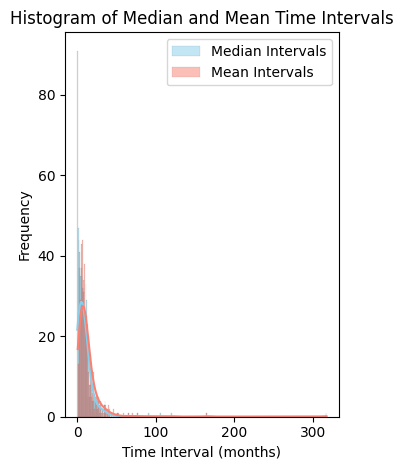

In [100]:
# Histograms
plt.subplot(1, 2, 2)
sbs.histplot(median_time_intervals['Time_Difference'], kde=True, color='skyblue', label='Median Intervals', binwidth=1)
sbs.histplot(mean_time_intervals['Time_Difference'], kde=True, color='salmon', label='Mean Intervals', binwidth=1)
plt.title('Histogram of Median and Mean Time Intervals')
plt.xlabel('Time Interval (months)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Historical Features

###  Rituximab current status

In [418]:
def Rituximab(data):
    if isinstance(data['CPD ISMed'], str) and 'Rituximab' in [med.strip() for med in data['CPD ISMed'].split(',')]:
        return 'Rituximab'


In [419]:
data['Rituximab'] = data.apply(Rituximab, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2126280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rituximab'] = data.apply(Rituximab, axis = 1)


In [422]:
data['Rituximab'].value_counts(dropna=False)

Rituximab
0.0    5694
1.0    1326
Name: count, dtype: int64

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2093833610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rituximab'] = data['Rituximab'].map({'Rituximab': 1})


In [421]:
data['Rituximab'] = data['Rituximab'].map({'Rituximab': 1}).fillna(0)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1466387476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rituximab'] = data['Rituximab'].map({'Rituximab': 1}).fillna(0)


## Rituximab status: last 6 months

In [423]:

# Ensure date columns are in datetime format
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
data['Date of IV Rtx']=pd.to_datetime(data['Date of IV Rtx'], format='%Y-%m-%d')


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2925525738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2925525738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date of IV Rtx']=pd.to_datetime(data['Date of IV Rtx'], format='%Y-%m-%d')


In [426]:
import pandas as pd

# Define a function to check if Rituximab was given in the last 6 months
def check_rituximab_within_6months(group):
    last_rituximab_date = None
    rituximab_6months = []
    
    for i, row in group.iterrows():
        if pd.notna(row['Date of IV Rtx']):  # If Rituximab was given
            last_rituximab_date = row['Date of IV Rtx']
        
        # Check if Rituximab is in 'Immunosuppressive.medication_x' within the last 6 months
        if last_rituximab_date is not None:
            within_6months = row['Date_Of_Visit'] <= last_rituximab_date + pd.DateOffset(months=6)
            if within_6months or (pd.notna(row['Rituximab']) and row['Rituximab'] == 1):
                rituximab_6months.append(1)
            else:
                rituximab_6months.append(0)
        else:
            if pd.notna(row['Rituximab']) and row['Rituximab'] == 1:
                rituximab_6months.append(1)
            else:
                rituximab_6months.append(0)
    
    return pd.Series(rituximab_6months, index=group.index)

# Apply the function group by RKD.ID
data['Rituximab_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_rituximab_within_6months)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\403422203.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['Rituximab_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_rituximab_within_6months)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\403422203.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rituximab_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_rituximab_within_6months)


In [427]:
data['Rituximab_6months'].value_counts(dropna=False)

Rituximab_6months
0    5690
1    1330
Name: count, dtype: int64

### Current MMF Status

In [428]:
def MMF(data):
    if isinstance(data['CPD ISMed'], str) and 'Mycophenolate mofetil' in [med.strip() for med in data['CPD ISMed'].split(',')]:
        return 'Mycophenolate mofetil'




In [429]:
data['MMF'] = data.apply(MMF, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\195011212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MMF'] = data.apply(MMF, axis = 1)


In [430]:
data['MMF'] = data['MMF'].map({'Mycophenolate mofetil': 1}).fillna(0)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3149699219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MMF'] = data['MMF'].map({'Mycophenolate mofetil': 1}).fillna(0)


In [431]:
data['MMF'].value_counts(dropna=False)

MMF
0.0    6471
1.0     549
Name: count, dtype: int64

## MMF status last 6 months

In [432]:

# Ensure date columns are in datetime format
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
data['Stop Date_myc']=pd.to_datetime(data['Stop Date_myc'], format='%Y-%m-%d')


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\796315539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\796315539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stop Date_myc']=pd.to_datetime(data['Stop Date_myc'], format='%Y-%m-%d')


In [433]:
import pandas as pd

# Define a function to check if Rituximab was given in the last 6 months
def check_MMF_within_6months(group):
    last_MMF_date = None
    MMF_6months = []
    
    for i, row in group.iterrows():
        if pd.notna(row['Stop Date_myc']):  # If Rituximab was given
            last_MMF_date = row['Stop Date_myc']
        
        # Check if Rituximab is in 'Immunosuppressive.medication_x' within the last 6 months
        if last_MMF_date is not None:
            within_6months = row['Date_Of_Visit'] <= last_MMF_date + pd.DateOffset(months=6)
            if within_6months or (pd.notna(row['Immunosuppressive.medication_x']) and row['Immunosuppressive.medication_x'] == 'Mycophenolate mofetil'):
                MMF_6months.append(1)
            else:
                MMF_6months.append(0)
        else:
            if pd.notna(row['Immunosuppressive.medication_x']) and row['Immunosuppressive.medication_x'] == 'Mycophenolate mofetil':
                MMF_6months.append(1)
            else:
                MMF_6months.append(0)
    
    return pd.Series(MMF_6months, index=group.index)

# Apply the function group by RKD.ID
data['MMF_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_MMF_within_6months)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1849978157.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['MMF_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_MMF_within_6months)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1849978157.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MMF_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_MMF_within_6months)


In [434]:
data['MMF_6months'].value_counts(dropna=False)

MMF_6months
0    6413
1     607
Name: count, dtype: int64

### 3. Methotrexate last 6 months

In [435]:
def Methotrexate(data): 
    if isinstance(data['CPD ISMed'], str) and 'Methotrexate' in [med.strip() for med in data['CPD ISMed'].split(',')]:
        return 'Methotrexate'
 

In [436]:
data['Methotrexate'] = data.apply(Methotrexate, axis = 1)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2125988589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Methotrexate'] = data.apply(Methotrexate, axis = 1)


In [437]:
data['Methotrexate'].value_counts(dropna=False)

Methotrexate
None            6688
Methotrexate     332
Name: count, dtype: int64

In [438]:
data['Methotrexate'] = data['Methotrexate'].map({'Methotrexate': 1}).fillna(0)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\159167353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Methotrexate'] = data['Methotrexate'].map({'Methotrexate': 1}).fillna(0)


In [439]:

# Ensure date columns are in datetime format
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
data['Stop Date_met']=pd.to_datetime(data['Stop Date_met'], format='%Y-%m-%d')


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2449195598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2449195598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stop Date_met']=pd.to_datetime(data['Stop Date_met'], format='%Y-%m-%d')


In [440]:
import pandas as pd

# Define a function to check if Rituximab was given in the last 6 months
def check_Methotrexate_within_6months(group):
    last_Methotrexate_date = None
    Methotrexate_6months = []
    
    for i, row in group.iterrows():
        if pd.notna(row['Stop Date_met']): 
            last_Methotrexate_date = row['Stop Date_met']
        
        
        if last_Methotrexate_date is not None:
            within_6months = row['Date_Of_Visit'] <= last_Methotrexate_date + pd.DateOffset(months=6)
            if within_6months or (pd.notna(row['Methotrexate']) and row['Methotrexate'] == 1):
                Methotrexate_6months.append(1)
            else:
                Methotrexate_6months.append(0)
        else:
            if pd.notna(row['Methotrexate']) and row['Methotrexate'] == 1:
                Methotrexate_6months.append(1)
            else:
                Methotrexate_6months.append(0)
    
    return pd.Series(Methotrexate_6months, index=group.index)

# Apply the function group by RKD.ID
data['Methotrexate_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_Methotrexate_within_6months)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2466468059.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['Methotrexate_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_Methotrexate_within_6months)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2466468059.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Methotrexate_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_Methotrexate_within_6months)


In [441]:
data['Methotrexate_6months'].value_counts(dropna=False)

Methotrexate_6months
0    6621
1     399
Name: count, dtype: int64

In [320]:
data['Methotrexate_6months'].value_counts(dropna=False)

Methotrexate_6months
0    6621
1     399
Name: count, dtype: int64

## Current Azathioprine Status

In [442]:
def AZA(data):    
    if isinstance(data['CPD ISMed'], str) and 'Azathioprine' in [med.strip() for med in data['CPD ISMed'].split(',')]:
        return 1

In [443]:
data['AZA'] = data.apply(AZA, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3607175038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AZA'] = data.apply(AZA, axis = 1)


In [444]:

data['AZA'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\518413601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AZA'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\518413601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AZA'].fillna(0,inplace=True)


In [445]:
data['AZA'].value_counts(dropna=False)

AZA
0.0    5432
1.0    1588
Name: count, dtype: int64

## Azathioprine last 6 months

In [446]:

# Ensure date columns are in datetime format
data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
data['Stop Date_aza']=pd.to_datetime(data['Stop Date_aza'], format='%Y-%m-%d')


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3070539575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Of_Visit']=pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3070539575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stop Date_aza']=pd.to_datetime(data['Stop Date_aza'], format='%Y-%m-%d')


In [447]:
import pandas as pd

# Define a function to check if Rituximab was given in the last 6 months
def check_AZA_within_6months(group):
    last_AZA_date = None
    AZA_6months = []
    
    for i, row in group.iterrows():
        if pd.notna(row['Stop Date_aza']):  # If Rituximab was given
            last_AZA_date = row['Stop Date_aza']
        
        # Check if Rituximab is in 'Immunosuppressive.medication_x' within the last 6 months
        if last_AZA_date is not None:
            within_6months = row['Date_Of_Visit'] <= last_AZA_date + pd.DateOffset(months=6)
            if within_6months or (pd.notna(row['AZA']) and row['AZA'] == 1):
                AZA_6months.append(1)
            else:
                AZA_6months.append(0)
        else:
            if pd.notna(row['AZA']) and row['AZA'] ==1:
                AZA_6months.append(1)
            else:
                AZA_6months.append(0)
    
    return pd.Series(AZA_6months, index=group.index)

# Apply the function group by RKD.ID
data['AZA_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_AZA_within_6months)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1373971429.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['AZA_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_AZA_within_6months)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1373971429.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['AZA_6months'] = data.groupby('RKD.ID', group_keys=False).apply(check_AZA_within_6months)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_2

In [448]:
data['AZA_6months'].value_counts(dropna=False)

AZA_6months
0    5214
1    1806
Name: count, dtype: int64

In [115]:
data['AZA_6months'].value_counts(dropna=False)

AZA_6months
0.0    4658
1.0    2362
Name: count, dtype: int64

In [279]:
data['AZA_6months'].value_counts(dropna=False)

AZA_6months
0    5214
1    1806
Name: count, dtype: int64

In [449]:
data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/data7.csv',index=True)


## Previous relapse# This feature is not needed for first relapse prediction

In [119]:
def rlp(data):    
    if (data['CPD_relapse']=='Definite Relapse'):
        return 1

In [120]:
data['rlp'] = data.apply(rlp, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\1148304147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rlp'] = data.apply(rlp, axis = 1)


In [121]:
data['rlp']=data.groupby('RKD.ID').ffill()['rlp']

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\2891949075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rlp']=data.groupby('RKD.ID').ffill()['rlp']


In [122]:
data['rlp'].value_counts(dropna=False)

rlp
NaN    4927
1.0    2093
Name: count, dtype: int64

In [123]:
def Previous_relapse(data):    
    if (data['CPD_relapse']=='Definite Relapse'):
        return 0


In [124]:
data['Previous_relapse'] = data.apply(Previous_relapse, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\1633889300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous_relapse'] = data.apply(Previous_relapse, axis = 1)


In [125]:
data['Previous_relapse'].value_counts(dropna=False)

Previous_relapse
NaN    6607
0.0     413
Name: count, dtype: int64

In [126]:
data['Previous_relapse'].fillna(data['rlp'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\227020245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Previous_relapse'].fillna(data['rlp'],inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\227020245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous_relapse'].fillna(data['rlp'],inplace=True)

In [127]:
data['Previous_relapse'].value_counts(dropna=False)

Previous_relapse
NaN    4927
1.0    1680
0.0     413
Name: count, dtype: int64

In [128]:
data['Previous_relapse'].fillna(0,inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\2269832989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Previous_relapse'].fillna(0,inplace=True)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_30080\2269832989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous_relapse'].fillna(0,inplace=True)


## ANCA switch

In [450]:
data['ANCA IF_pre'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\417430006.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA IF_pre'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(1)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\417430006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ANCA IF_pre'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(1)


In [451]:
data['ANCA IF_post'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(-1)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2709418373.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA IF_post'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(-1)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2709418373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ANCA IF_post'] = data.groupby(['RKD.ID'])['ANCA.IF'].shift(-1)


In [452]:
def ancastatus(data):    
    if (data['ANCA IF_pre'] =='Negative') & (data['ANCA IF_pre']=='Negative')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200):
        return 'Negative'
    elif (data['ANCA IF_post'] =='Positive') & (data['ANCA IF_post']=='Positive')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200):
        return 'Positive'
    elif (data['ANCA IF_post'] =='Atypical') & (data['ANCA IF_post']=='Atypical')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200):
        return 'Atypical'
    

In [453]:

data['ancastatus'] = data.apply(ancastatus, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\687635160.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ancastatus'] = data.apply(ancastatus, axis = 1)
C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\687635160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ancastatus'] = data.apply(ancastatus, axis = 1)


In [454]:
data['ancastatus'].value_counts(dropna=False)

ancastatus
None        6794
Negative     198
Atypical      28
Name: count, dtype: int64

In [455]:
def ANCAIF_nw(data):    
    if (data['ANCA IF_pre'] =='Negative') & (data['ANCA IF_post']=='Negative') & (data['Delta_t_previous']<=200) & (data['Delta_t_post']<=200)&(data['ANCA.IF']=='Not tested'):
        return 'Negative'
    elif (data['ANCA IF_pre'] =='C') & (data['ANCA IF_post']=='C')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200)&(data['ANCA.IF']=='Not tested') :
        return 'C'
    elif (data['ANCA IF_pre'] =='P') & (data['ANCA IF_post']=='P')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200)&(data['ANCA.IF']=='Not tested'):
        return 'P'
    elif (data['ANCA IF_pre'] =='Atypical') & (data['ANCA IF_post']=='Atypical')& (data['Delta_t_previous']<=200)&(data['Delta_t_post']<=200)&(data['ANCA.IF']=='Not tested'):
        return 'Atypical'
    

In [456]:

data['ANCAIF_nw'] = data.apply(ANCAIF_nw, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3734994526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCAIF_nw'] = data.apply(ANCAIF_nw, axis = 1)


In [457]:
data['ANCAIF_nw'].fillna(data['ANCA.IF'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2042393290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ANCAIF_nw'].fillna(data['ANCA.IF'],inplace=True)


In [458]:

data['ANCA.IF'].value_counts(dropna=False)

ANCA.IF
NaN           3763
Not tested    1000
C              712
P              706
Negative       700
Atypical        84
Pending         55
Name: count, dtype: int64

In [459]:

data['ANCAIF_nw'].value_counts(dropna=False)

ANCAIF_nw
NaN           3763
Not tested     946
C              733
P              723
Negative       715
Atypical        85
Pending         55
Name: count, dtype: int64

In [460]:
data['ANCAIF_nw_1'] = data.groupby(['RKD.ID'])['ANCAIF_nw'].shift(1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2897031956.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCAIF_nw_1'] = data.groupby(['RKD.ID'])['ANCAIF_nw'].shift(1)


In [461]:
def ancalevel3(data):    
    if (data['ANCAIF_nw'] =='Negative'):
        return 2
    

In [462]:

data['ancalevel3'] = data.apply(ancalevel3, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2042417159.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ancalevel3'] = data.apply(ancalevel3, axis = 1)


In [463]:
def ancalevel(data):    
    if (data['At.any.point.ANCA.specificity']=='MPO'):
        return data['Anti.MPO.level']
    elif (data['At.any.point.ANCA.specificity']=='PR3'):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='ELISA negative')&(data['ANCA.IF'] =='P'):
        return data['Anti.MPO.level']
    elif (data['At.any.point.ANCA.specificity'] =='ELISA negative')&(data['ANCA.IF'] =='C'):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='ELISA negative')&(data['ANCA.IF'] =='Negative')&(data['Anti.PR3.level']>=data['Anti.MPO.level']):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='ELISA negative')&(data['ANCA.IF'] =='Atypical')&(data['Anti.PR3.level']>=data['Anti.MPO.level']):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='ELISA negative')&(data['ANCA.IF'] =='Pending')&(data['Anti.PR3.level']>=data['Anti.MPO.level']):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='MPO and PR3')&(data['Anti.PR3.level']<=data['Anti.MPO.level']):
        return data['Anti.MPO.level']
    elif (data['At.any.point.ANCA.specificity'] =='MPO and PR3')&(data['Anti.PR3.level']>data['Anti.MPO.level']):
        return data['Anti.PR3.level']
    elif (data['At.any.point.ANCA.specificity'] =='MPO and PR3')&(data['ANCA.IF'] =='Not tested'):
        return data['Anti.MPO.level']
    elif (data['At.any.point.ANCA.specificity'] =='MPO and PR3')&(data['ANCA.IF'] =='Atypical'):
        return data['Anti-MPO level']
    elif (data['At.any.point.ANCA.specificity'] =='No ELISA performed'):
        return data['Anti.PR3.level']
    
    
    
    
    

In [464]:

data['ANCA_level'] = data.apply(ancalevel, axis = 1)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4054293319.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_level'] = data.apply(ancalevel, axis = 1)


In [465]:
data['ANCA_level'].fillna(data['ancalevel3'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2854777096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ANCA_level'].fillna(data['ancalevel3'],inplace=True)


In [466]:
## Create a new variable- ANCA_Status 
def anca_status1(data): 
    if (data['ANCA_level']<=2):
        return 'ANCA Negative'
    elif (data['ANCA_level']>2):
        return 'ANCA Positive'



In [467]:

data['ANCA_Status1'] = data.apply(anca_status1, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2111880144.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_Status1'] = data.apply(anca_status1, axis = 1)


In [468]:
def anca_status2(data):    
    if (data['ANCAIF_nw']=='Negative'):
        return 'ANCA Negative'
    elif (data['ANCAIF_nw']=='C'):
        return "ANCA Positive"
    elif (data['ANCAIF_nw']=='P'):
        return 'ANCA Positive'
    elif (data['ANCAIF_nw']=='Atypical'): 
        return 'ANCA Positive'

In [469]:

data['ANCA_Status2'] = data.apply(anca_status2, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\848874717.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_Status2'] = data.apply(anca_status2, axis = 1)


In [470]:
data['ANCA_Status1'].fillna(data['ANCA_Status2'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3401221081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ANCA_Status1'].fillna(data['ANCA_Status2'],inplace=True)


In [471]:
data.drop(['ANCA_Status2','ancalevel3'], axis=1, inplace=True)

In [472]:
data['ANCA_Status1'].value_counts(dropna=False)

ANCA_Status1
None             4159
ANCA Positive    1896
ANCA Negative     965
Name: count, dtype: int64

In [473]:
data['ANCA_Status_1'] = data.groupby(['RKD.ID'])['ANCA_Status1'].shift(1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\416630138.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_Status_1'] = data.groupby(['RKD.ID'])['ANCA_Status1'].shift(1)


In [474]:
def ANCA_group(data):    
    if (data['ANCA_Status_1'] =='ANCA Negative')&(data['ANCA_Status1']=='ANCA Negative')&(data['Delta_t_previous']<=550):
        return 'Neg-Neg'
    elif (data['ANCA_Status_1'] =='ANCA Negative')&(data['ANCA_Status1']=='ANCA Positive')&(data['Delta_t_previous']<=550):
        return 'Neg-Pos'
    elif (data['ANCA_Status_1'] =='ANCA Positive')&(data['ANCA_Status1']=='ANCA Positive')&(data['Delta_t_previous']<=550):
        return 'Pos-Pos'
    elif (data['ANCA_Status_1'] =='ANCA Positive')&(data['ANCA_Status1']=='ANCA Negative')&(data['Delta_t_previous']<=550):
        return 'Pos-Neg'
    else:
        return 'Switch Status Unknown'

In [475]:
data['ANCA_group'] = data.apply(ANCA_group, axis = 1)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4106831817.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_group'] = data.apply(ANCA_group, axis = 1)


In [476]:
def ANCA_switch(data):    
    if (data['CPD_relapse'] =='Definite Relapse'):
        return 'NA'

In [477]:
data['ANCA_switch'] = data.apply(ANCA_switch, axis = 1)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2761639527.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['ANCA_switch'] = data.apply(ANCA_switch, axis = 1)


In [478]:
data['ANCA_switch'].fillna(data['ANCA_group'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3071787752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ANCA_switch'].fillna(data['ANCA_group'],inplace=True)


In [479]:
data['ANCA_switch'].value_counts(dropna=False)

ANCA_switch
Switch Status Unknown    5234
Pos-Pos                   838
NA                        413
Neg-Neg                   377
Pos-Neg                    89
Neg-Pos                    69
Name: count, dtype: int64

In [480]:
data['ANCA_Status1'].value_counts(dropna=False)

ANCA_Status1
None             4159
ANCA Positive    1896
ANCA Negative     965
Name: count, dtype: int64

In [481]:
data['ANCA_Status1'].fillna('ANCA Status Unknown',inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1327860053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ANCA_Status1'].fillna('ANCA Status Unknown',inplace=True)


In [148]:
data.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/persistent_pos.csv',index=True)


## Treatment Discountinuation points

In [482]:
data['Date_Of_Visit'] = pd.to_datetime(data['Date_Of_Visit'], format='%Y-%m-%d')
data['Date_Of_Visit']

0       2012-08-31
1       2012-09-07
2       2012-09-17
3       2012-09-21
4       2012-09-28
           ...    
10631   2015-05-19
10632   2017-02-24
10633   2023-02-14
10634   2024-02-06
10635   2024-05-20
Name: Date_Of_Visit, Length: 7020, dtype: datetime64[ns]

In [483]:
data['Immunosuppressive.status+1'] = data.groupby(['RKD.ID'])['Immunosuppressive.status_x'].shift(-1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\192431476.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Immunosuppressive.status+1'] = data.groupby(['RKD.ID'])['Immunosuppressive.status_x'].shift(-1)


In [484]:
data['Date_Of_Visit+1'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(-1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2016929995.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Date_Of_Visit+1'] = data.groupby(['RKD.ID'])['Date_Of_Visit'].shift(-1)


In [485]:
data['Date_Of_Visit+1'] = pd.to_datetime(data['Date_Of_Visit+1'], format='%Y-%m-%d')
data['Date_Of_Visit+1']

0       2012-09-07
1       2012-09-17
2       2012-09-21
3       2012-09-28
4       2012-10-01
           ...    
10631   2017-02-24
10632   2023-02-14
10633   2024-02-06
10634   2024-05-20
10635          NaT
Name: Date_Of_Visit+1, Length: 7020, dtype: datetime64[ns]

In [486]:
data['CPD_on_off+1']=data.groupby(['RKD.ID'])['CPD_on_off'].shift(-1)
data['CPD_on_off+1'].value_counts(dropna=False)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1009745644.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['CPD_on_off+1']=data.groupby(['RKD.ID'])['CPD_on_off'].shift(-1)


CPD_on_off+1
On Treatment                4505
Off Treatment               1178
NaN                          595
Manual review                330
Treatment Status Unknown     265
Prednisolone<=10             147
Name: count, dtype: int64

In [487]:
data['CPD_on_off+1'].fillna('NA', inplace=True)


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2823367593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CPD_on_off+1'].fillna('NA', inplace=True)


In [488]:
#lets have a look at the difference between the encounters
data['enc_diff'] = ((data['Date_Of_Visit+1']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))
data['enc_diff'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2361542141.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['enc_diff'] = ((data['Date_Of_Visit+1']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))


595

In [489]:
data['Immunosuppressive.status+1']=data.groupby(['RKD.ID'])['Immunosuppressive.status_x'].shift(-1)

In [490]:
data['Immunosuppressive.medication.in.response.to.this.encounter_x'].value_counts(dropna=False)

Immunosuppressive.medication.in.response.to.this.encounter_x
NaN                               3385
No change in Immunosuppression    2666
Immunosuppression increased        650
Immunosuppression reduced          235
Immunosuppression stopped           68
Unknown                             16
Name: count, dtype: int64

In [491]:
data.rename(columns = {'Immunosuppressive.medication.in.response.to.this.encounter_x':'Immunosuppressive.medication.in.response.to.this.encounter'}, inplace = True)

In [497]:
def dis_con_points(data):  
    if (data['Immunosuppressive.medication.in.response.to.this.encounter']=='Immunosuppression stopped')&((data['CPD_on_off+1']=='Off Treatment')|(data['CPD_on_off+1']=='Treatment Status Unknown')|(data['CPD_on_off+1']=='Prednisolone<=10')):
        return 'Treatment Stopped'
    elif (data['Immunosuppressive.status_x']=='Currently on immunosuppression')&(data['Immunosuppressive.status+1']=='Discontinuation of immunosuppression > 6 months prior to this encounter')&(data['CPD_on_off+1']=='Off Treatment')&(data['enc_diff']<=365):
        return 'Treatment Stopped'
    elif (data['Immunosuppressive.status_x']=='Currently on immunosuppression')&(data['Immunosuppressive.status+1']=='Discontinuation of immunosuppression within 6 months prior to this encounter')&(data['CPD_on_off+1']=='Off Treatment')&(data['enc_diff']<=365):
        return 'Treatment Stopped'
    



In [498]:

data['dis_con_points'] = data.apply(dis_con_points, axis = 1)

In [499]:
data['dis_con_points'].value_counts(dropna=False)

dis_con_points
None                 6885
Treatment Stopped     135
Name: count, dtype: int64

In [500]:
# Initialize a new column for treatment discontinuation points
data['treatment_discontinuation_points'] = None

# Define the threshold for continuous off treatment in months
threshold_months = 12

# Group by RKD ID and iterate through the groups
for rkd_id, group in data.groupby('RKD.ID'):
    # Sort the group by Date_Of_Visit just in case
    group = group.sort_values('Date_Of_Visit')
    
    # Iterate through the group to identify discontinuation points
    for i in range(len(group) - 1):
        if group.iloc[i]['CPD_on_off'] == 'On Treatment' and group.iloc[i + 1]['CPD_on_off'] == 'Off Treatment':
            # Check the next instances to find if off treatment lasts for 12 months
            off_treatment_start_date = group.iloc[i + 1]['Date_Of_Visit']
            end_date = off_treatment_start_date + pd.DateOffset(months=threshold_months)
            mask = (group['Date_Of_Visit'] > off_treatment_start_date) & (group['Date_Of_Visit'] <= end_date)
            
            # Ensure all records within the period are 'Off Treatment'
            if (group.loc[mask, 'CPD_on_off'] == 'Off Treatment').all() and not group[mask].empty:
                # If there's no visits within the 12 months after going off treatment or all are "Off Treatment"
                data.loc[group.index[i], 'treatment_discontinuation_points'] = 'Treatment Stopped'

# Ensure the last row for each RKD ID is not marked as a discontinuation point
last_rows = data.groupby('RKD.ID').tail(1).index
data.loc[last_rows, 'treatment_discontinuation_points'] = None


C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\583250417.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['treatment_discontinuation_points'] = None


In [501]:
data['treatment_discontinuation_points'].value_counts(dropna=False)

treatment_discontinuation_points
None                 6938
Treatment Stopped      82
Name: count, dtype: int64

In [502]:
data['dis_con_points'].fillna(data['treatment_discontinuation_points'],inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1142539149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dis_con_points'].fillna(data['treatment_discontinuation_points'],inplace=True)


In [503]:
data['dis_con_points'].value_counts(dropna=False)

dis_con_points
None                 6847
Treatment Stopped     173
Name: count, dtype: int64

## Ever stopped medication?

In [504]:
data['dis_con_points']=data.groupby('RKD.ID').ffill()['dis_con_points']

In [505]:
data['dis_con_points_1'] = data.groupby(['RKD.ID'])['dis_con_points'].shift(1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2581971085.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['dis_con_points_1'] = data.groupby(['RKD.ID'])['dis_con_points'].shift(1)


In [506]:
data['dis_con_points_1'].fillna('NA',inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\3646036286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dis_con_points_1'].fillna('NA',inplace=True)


In [507]:
def Treatment_stopped(data):    
    if (data['dis_con_points']=='Treatment Stopped')&(data['dis_con_points_1']=='Treatment Stopped'):
        return 'Yes'
    elif (data['dis_con_points']=='Treatment Stopped')&(data['dis_con_points_1']=='NA'):
        return 'No'


In [508]:

data['Treatment_stopped'] = data.apply(Treatment_stopped, axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\566101606.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Treatment_stopped'] = data.apply(Treatment_stopped, axis = 1)


In [509]:
data['Treatment_stopped'].fillna('No',inplace=True)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\2535427458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Treatment_stopped'].fillna('No',inplace=True)


In [510]:
data['Treatment_stopped'].value_counts(dropna=False)

Treatment_stopped
No     6074
Yes     946
Name: count, dtype: int64

In [511]:
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,ANCA_group,ANCA_switch,Immunosuppressive.status+1,Date_Of_Visit+1,CPD_on_off+1,enc_diff,dis_con_points,treatment_discontinuation_points,dis_con_points_1,Treatment_stopped
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,Switch Status Unknown,Switch Status Unknown,NaN,2012-09-07,On Treatment,7.0,NaN,None,NA,No
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,Switch Status Unknown,Switch Status Unknown,NaN,2012-09-17,On Treatment,10.0,NaN,None,NA,No
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,Switch Status Unknown,Switch Status Unknown,Currently on immunosuppression,2012-09-21,On Treatment,4.0,NaN,None,NA,No
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,Switch Status Unknown,Switch Status Unknown,Currently on immunosuppression,2012-09-28,On Treatment,7.0,NaN,None,NA,No
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,Switch Status Unknown,Switch Status Unknown,Currently on immunosuppression,2012-10-01,On Treatment,3.0,NaN,None,NA,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,28615,Encounters,2015-05-19,49.8,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,Switch Status Unknown,Switch Status Unknown,Currently on immunosuppression,2017-02-24,On Treatment,647.0,NaN,None,NA,No
10632,28615,Encounters,2017-02-24,71.1,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,Switch Status Unknown,Switch Status Unknown,Discontinuation of immunosuppression > 6 month...,2023-02-14,Off Treatment,2181.0,Treatment Stopped,Treatment Stopped,NA,No
10633,28615,Encounters,2023-02-14,142.7,Discontinuation of immunosuppression > 6 month...,No,NaN,Increased,No,NaN,...,Switch Status Unknown,NA,Discontinuation of immunosuppression > 6 month...,2024-02-06,Off Treatment,357.0,Treatment Stopped,None,Treatment Stopped,Yes
10634,28615,Encounters,2024-02-06,154.5,Discontinuation of immunosuppression > 6 month...,No,NaN,No change,No,NaN,...,Pos-Pos,Pos-Pos,Discontinuation of immunosuppression > 6 month...,2024-05-20,Off Treatment,104.0,Treatment Stopped,None,Treatment Stopped,Yes


## Next relapse status

In [512]:
data['Relapse+1'] = data.groupby(['RKD.ID'])['CPD_relapse'].shift(-1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\674029745.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Relapse+1'] = data.groupby(['RKD.ID'])['CPD_relapse'].shift(-1)


## Relapse Status next 12 months

In [513]:
data['Date_Of_Visit'] = pd.to_datetime(data['Date_Of_Visit'], format='%d/%m/%Y')


In [514]:
data['CPD_relapse'].value_counts()

CPD_relapse
No Relapse                4046
Definite Relapse           413
Exclude this encounter     204
Possible Relapse            59
Name: count, dtype: int64

In [515]:
def Relapse_date(data):    
    if (data['CPD_relapse']=='Definite Relapse'):
        return data['Date_Of_Visit']

In [516]:
data['Relapse_date'] = data.apply(Relapse_date,axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1079759120.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Relapse_date'] = data.apply(Relapse_date,axis = 1)


In [517]:
data['Relapse_date'].isnull().sum()

6607

In [518]:
data['Relapse_date']=data.groupby('RKD.ID').bfill()['Relapse_date']

In [519]:
data['Relapse_date'] = pd.to_datetime(data['Relapse_date'], format='%d/%m/%Y')


In [520]:
data['Date_Of_Visit'] = pd.to_datetime(data['Date_Of_Visit'], format='%d/%m/%Y')


In [521]:
data['Time_D']=((data['Relapse_date']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))
data['Time_D'].isnull().sum()

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\4270184992.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Time_D']=((data['Relapse_date']-data['Date_Of_Visit'])/np.timedelta64(1,'D'))


4243

In [522]:
data['Time_D']

0        3164.0
1        3157.0
2        3147.0
3        3143.0
4        3136.0
          ...  
10631    2828.0
10632    2181.0
10633       0.0
10634     104.0
10635       0.0
Name: Time_D, Length: 7020, dtype: float64

In [523]:
def Relapse_next_12_months(data):    
    if (data['Time_D']<=366):
        return 1
    else:
        return 0

In [528]:
data['Relapse_next_6_months'] = data.apply(Relapse_next_12_months,axis = 1)

C:\Users\georgea1\AppData\Local\Temp\ipykernel_23364\1221187227.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Relapse_next_6_months'] = data.apply(Relapse_next_12_months,axis = 1)


In [529]:
data['Relapse_next_6_months'].value_counts(dropna=False)

Relapse_next_6_months
0    6104
1     916
Name: count, dtype: int64

## Merge with Kideny Function data

In [530]:
data2=pd.read_csv("C:/Users/georgea1/OneDrive - Trinity College Dublin/Angel George/Chap 2. Treatment/Data/LSTM Data/August-2024/Kidney_function.csv")
data2

,RKD.ID,Date_Of_Visit,Interval.from.diagnosis..months.,Date.of.transplant.,Date.of.graft.failure,Dialysis1,Dialysis.1,Dialysis
0,1,2012-08-31,0.0,NaN,NaN,NaN,Off Dialysis,Off Dialysis
1,1,2012-09-07,0.2,NaN,NaN,NaN,NaN,Functioning native kidneys
2,1,2012-09-17,0.6,NaN,NaN,NaN,NaN,Functioning native kidneys
3,1,2012-09-21,0.7,NaN,NaN,NaN,Off Dialysis,Off Dialysis
4,1,2012-09-28,0.9,NaN,NaN,NaN,NaN,Functioning native kidneys
...,...,...,...,...,...,...,...,...
7213,28615,2024-02-06,154.5,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7214,28615,2024-05-20,157.9,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7215,28619,2024-06-25,0.0,NaN,NaN,NaN,On Dialysis,On Dialysis
7216,28621,2024-07-19,0.0,NaN,NaN,NaN,Off Dialysis,Off Dialysis


In [531]:
data['Date_Of_Visit'] = pd.to_datetime(data['Date_Of_Visit'])
data2['Date_Of_Visit'] = pd.to_datetime(data2['Date_Of_Visit'])
# Merge with left join
data = pd.merge(data, data2, on=['RKD.ID', 'Date_Of_Visit'], how='left')
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,Relapse_date,Time_D,Relapse_next_12_months,Relapse_next_6_months,Interval.from.diagnosis..months.,Date.of.transplant.,Date.of.graft.failure,Dialysis1,Dialysis.1,Dialysis
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,2021-04-30,3164.0,0,0,0.0,NaN,NaN,NaN,Off Dialysis,Off Dialysis
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-04-30,3157.0,0,0,0.2,NaN,NaN,NaN,NaN,Functioning native kidneys
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-04-30,3147.0,0,0,0.6,NaN,NaN,NaN,NaN,Functioning native kidneys
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,2021-04-30,3143.0,0,0,0.7,NaN,NaN,NaN,Off Dialysis,Off Dialysis
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,2021-04-30,3136.0,0,0,0.9,NaN,NaN,NaN,NaN,Functioning native kidneys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,28615,Encounters,2015-05-19,49.8,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,2023-02-14,2828.0,0,0,49.8,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7017,28615,Encounters,2017-02-24,71.1,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,2023-02-14,2181.0,0,0,71.1,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7018,28615,Encounters,2023-02-14,142.7,Discontinuation of immunosuppression > 6 month...,No,NaN,Increased,No,NaN,...,2023-02-14,0.0,1,1,142.7,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7019,28615,Encounters,2024-02-06,154.5,Discontinuation of immunosuppression > 6 month...,No,NaN,No change,No,NaN,...,2024-05-20,104.0,1,1,154.5,NaN,NaN,NaN,Off Dialysis,Off Dialysis


In [532]:
data['Urine.sCD163..ng.mmmol...Euroimmun'].isnull().sum()

6360

In [533]:
data['Urine.sCD163..ng.mmmol...Duoset'].isnull().sum()

6683

## Creatinine

In [534]:
data['Creatinine'].isnull().sum()

3391

## CRP

In [535]:
data['CRP'].isnull().sum()

4183

## Uninalysis Protein

In [537]:
data['Urinalysis.Protein'].value_counts(dropna=False)

Urinalysis.Protein
NaN         4423
Negative    1334
1            547
2            461
>=+3         256
Name: count, dtype: int64

## Urinalysis.Blood

In [538]:
data['Urinalysis.Blood'].value_counts(dropna=False)

Urinalysis.Blood
NaN         4423
Negative    1745
1            374
2            289
>=+3         190
Name: count, dtype: int64

In [539]:
data['Urine.PCR.ACR..mg.mmol.'].isnull().sum()

5600

In [540]:
data1=data.loc[:,['RKD.ID','Date_Of_Visit','Interval.from.diagnosis..months._x','At.any.point.ANCA.specificity','Delta_t_previous','Delta_t_post','RTX_Status_induction','RTX_dose_category','Cyc_Status_induction','OralCyc_Status_induction','Rituximab_6months','MMF_6months','Methotrexate_6months','AZA_6months','Rituximab','MMF','Methotrexate','AZA','ANCA_switch','anca_kinetics_longterm','CPD_on_off','CPD_relapse','CPD ISMed','LTROT','Treatment_stopped','Dialysis','Urine.sCD163..ng.mmmol...Euroimmun','Urinalysis.Protein','Urine.PCR.ACR..mg.mmol.','Urinalysis.Blood','Relapse_next_6_months']]
data1

,RKD.ID,Date_Of_Visit,Interval.from.diagnosis..months._x,At.any.point.ANCA.specificity,Delta_t_previous,Delta_t_post,RTX_Status_induction,RTX_dose_category,Cyc_Status_induction,OralCyc_Status_induction,...,CPD_relapse,CPD ISMed,LTROT,Treatment_stopped,Dialysis,Urine.sCD163..ng.mmmol...Euroimmun,Urinalysis.Protein,Urine.PCR.ACR..mg.mmol.,Urinalysis.Blood,Relapse_next_6_months
0,1,2012-08-31,0.0,MPO,NaN,7.0,0,Not received,1,0,...,NaN,NaN,NaN,No,Off Dialysis,NaN,NaN,NaN,NaN,0
1,1,2012-09-07,0.2,MPO,7.0,10.0,0,Not received,1,0,...,NaN,"Corticosteroids, Cyclophosphamide",NaN,No,Functioning native kidneys,NaN,NaN,NaN,NaN,0
2,1,2012-09-17,0.6,MPO,10.0,4.0,0,Not received,1,0,...,NaN,"Corticosteroids, Cyclophosphamide",NaN,No,Functioning native kidneys,NaN,NaN,NaN,NaN,0
3,1,2012-09-21,0.7,MPO,4.0,7.0,0,Not received,1,0,...,NaN,"Corticosteroids, Cyclophosphamide",NaN,No,Off Dialysis,NaN,NaN,NaN,NaN,0
4,1,2012-09-28,0.9,MPO,7.0,3.0,0,Not received,1,0,...,NaN,"Corticosteroids, Cyclophosphamide",NaN,No,Functioning native kidneys,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,28615,2015-05-19,49.8,MPO,1516.0,647.0,0,Not received,1,0,...,No Relapse,Azathioprine,no,No,Off Dialysis,NaN,Negative,22.0,Negative,0
7017,28615,2017-02-24,71.1,MPO,647.0,2181.0,0,Not received,1,0,...,No Relapse,Azathioprine,no,No,Off Dialysis,NaN,1,NaN,Negative,0
7018,28615,2023-02-14,142.7,MPO,2181.0,357.0,0,Not received,1,0,...,Definite Relapse,NaN,no,Yes,Off Dialysis,NaN,>=+3,76.0,>=+3,1
7019,28615,2024-02-06,154.5,MPO,357.0,104.0,0,Not received,1,0,...,No Relapse,NaN,no,Yes,Off Dialysis,NaN,>=+3,NaN,>=+3,1


In [198]:
data

,RKD.ID,Repeat.Instrument_x,Date_Of_Visit,Interval.from.diagnosis..months._x,Immunosuppressive.status_x,Corticosteroids_x,Current.corticosteroid.dose_x,Corticosteroids.in.response.to.this.clinical.encounter.episode_x,Immunosuppressive.medication_x,Immunosuppressive.medication...other_x,...,Relapse+1,Relapse_date,Time_D,Relapse_next_6_months,Interval.from.diagnosis..months.,Date.of.transplant.,Date.of.graft.failure,Dialysis1,Dialysis.1,Dialysis
0,1,Encounters,2012-08-31,0.0,Treatment Naive,No,NaN,NaN,No,NaN,...,NaN,2021-04-30,3164.0,0,0.0,NaN,NaN,NaN,Off Dialysis,Off Dialysis
1,1,Encounters,2012-09-07,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30,3157.0,0,0.2,NaN,NaN,NaN,NaN,Functioning native kidneys
2,1,Encounters,2012-09-17,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30,3147.0,0,0.6,NaN,NaN,NaN,NaN,Functioning native kidneys
3,1,Encounters,2012-09-21,0.7,Currently on immunosuppression,Yes,> 20 mg/day,No change,IV Cyclophosphamide,NaN,...,NaN,2021-04-30,3143.0,0,0.7,NaN,NaN,NaN,Off Dialysis,Off Dialysis
4,1,Encounters,2012-09-28,0.9,Currently on immunosuppression,NaN,NaN,NaN,IV Cyclophosphamide,NaN,...,NaN,2021-04-30,3136.0,0,0.9,NaN,NaN,NaN,NaN,Functioning native kidneys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,28615,Encounters,2015-05-19,49.8,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,No Relapse,2023-02-14,2828.0,0,49.8,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7017,28615,Encounters,2017-02-24,71.1,Currently on immunosuppression,No,NaN,No change,Azathioprine,NaN,...,Definite Relapse,2023-02-14,2181.0,0,71.1,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7018,28615,Encounters,2023-02-14,142.7,Discontinuation of immunosuppression > 6 month...,No,NaN,Increased,No,NaN,...,No Relapse,2023-02-14,0.0,1,142.7,NaN,NaN,NaN,Off Dialysis,Off Dialysis
7019,28615,Encounters,2024-02-06,154.5,Discontinuation of immunosuppression > 6 month...,No,NaN,No change,No,NaN,...,Definite Relapse,2024-05-20,104.0,1,154.5,NaN,NaN,NaN,Off Dialysis,Off Dialysis


In [199]:
data1['RTX_Status_induction'].value_counts(dropna=False)

RTX_Status_induction
0    5429
1    1592
Name: count, dtype: int64

In [541]:
data1.to_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/LSTM_First_relapse_12_months_data1_21_08_2024.csv',index=True)


## RNN+ Logistic Regression

In [315]:
data=pd.read_csv('C:/Users/georgea1/OneDrive - Trinity College Dublin/Desktop/RNN_30_05_2024.csv')
data

,RKD ID,At any point ANCA specificity,Interval from diagnosis (months)_x,Delta_t_previous,Delta_t_post,RTX_Status_induction,RTX_induction_max_dose,Cyc_Status_induction,OralCyc_Status_induction,ESKD_at_diagnosis,...,Methotrexate,Methotrexate_6months,AZA,AZA_6months,Previous_relapse,ANCA_level_last_6,ANCA_level,LTROT,CPD_on_off,Relapse_next_6_months
0,1,MPO,6.0,35.0,35.0,0,NaN,1,0,0,...,0,0,1,1,0,26.0,NaN,no,On Treatment,0
1,1,MPO,7.1,35.0,7.0,0,NaN,1,0,0,...,0,0,1,1,0,7.0,NaN,no,On Treatment,0
2,1,MPO,7.4,7.0,14.0,0,NaN,1,0,0,...,0,0,1,1,0,7.0,NaN,no,On Treatment,0
3,1,MPO,7.8,14.0,53.0,0,NaN,1,0,0,...,0,0,1,1,0,1.7,NaN,no,On Treatment,0
4,1,MPO,9.6,53.0,24.0,0,NaN,1,0,0,...,0,0,1,1,0,0.5,NaN,no,On Treatment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,98,PR3,83.5,56.0,196.0,1,870.0,1,0,0,...,0,0,0,0,1,0.2,NaN,no,On Treatment,0
4338,98,PR3,89.9,196.0,119.0,1,870.0,1,0,0,...,0,0,0,0,1,0.2,NaN,no,On Treatment,0
4339,98,PR3,93.8,119.0,105.0,1,870.0,1,0,0,...,0,0,0,0,1,0.2,NaN,no,On Treatment,0
4340,98,PR3,97.3,105.0,175.0,1,870.0,1,0,0,...,0,0,0,0,1,0.2,NaN,no,Manual review,0


In [321]:
!pip install theano

  Using cached Theano-1.0.5-py3-none-any.whl


In [322]:
import sys, random
import numpy as np
import theano
import theano.tensor as T
from theano import config
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
import cPickle as pickle
from collections import OrderedDict
from sklearn.metrics import roc_auc_score

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\georgea1\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
C:\Users\georgea1\Anaconda3\lib\site-packages\theano\scalar\basic.py:2323: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [327]:
def unzip(zipped):
    new_params = OrderedDict()
    for key, value in zipped.iteritems():
        new_params[key] = value.get_value()
    return new_params
def numpy_floatX(data):
    return np.asarray(data, dtype=config.floatX)

def get_random_weight(dim1, dim2, left=-0.1, right=0.1):
    return np.random.uniform(left, right, (dim1, dim2)).astype(config.floatX)
def init_params(options):
    params = OrderedDict()
    inputDimSize = options['inputDimSize'] 
    hiddenDimSize = options['hiddenDimSize'] #hidden layer does not need an extra space
    params['W_emb'] = np.eye(inputDimSize, dtype=config.floatX)
    params['W_gru'] = get_random_weight(inputDimSize+1, 3*hiddenDimSize)
    params['U_gru'] = get_random_weight(hiddenDimSize, 3*hiddenDimSize)
    params['b_gru'] = np.zeros(3*hiddenDimSize).astype(config.floatX)
    params['W_logistic'] = get_random_weight(hiddenDimSize,1)
    params['b_logistic'] = np.zeros((1,), dtype=config.floatX)

    return params
def dropout_layer(state_before, use_noise, trng):
    proj = T.switch(use_noise, (state_before * trng.binomial(state_before.shape, p=0.5, n=1, dtype=state_before.dtype)), state_before * 0.5)
    return proj
def _slice(_x, n, dim):
    if _x.ndim == 3:
    return _x[:, :, n*dim:(n+1)*dim]
    return _x[:, n*dim:(n+1)*dim]